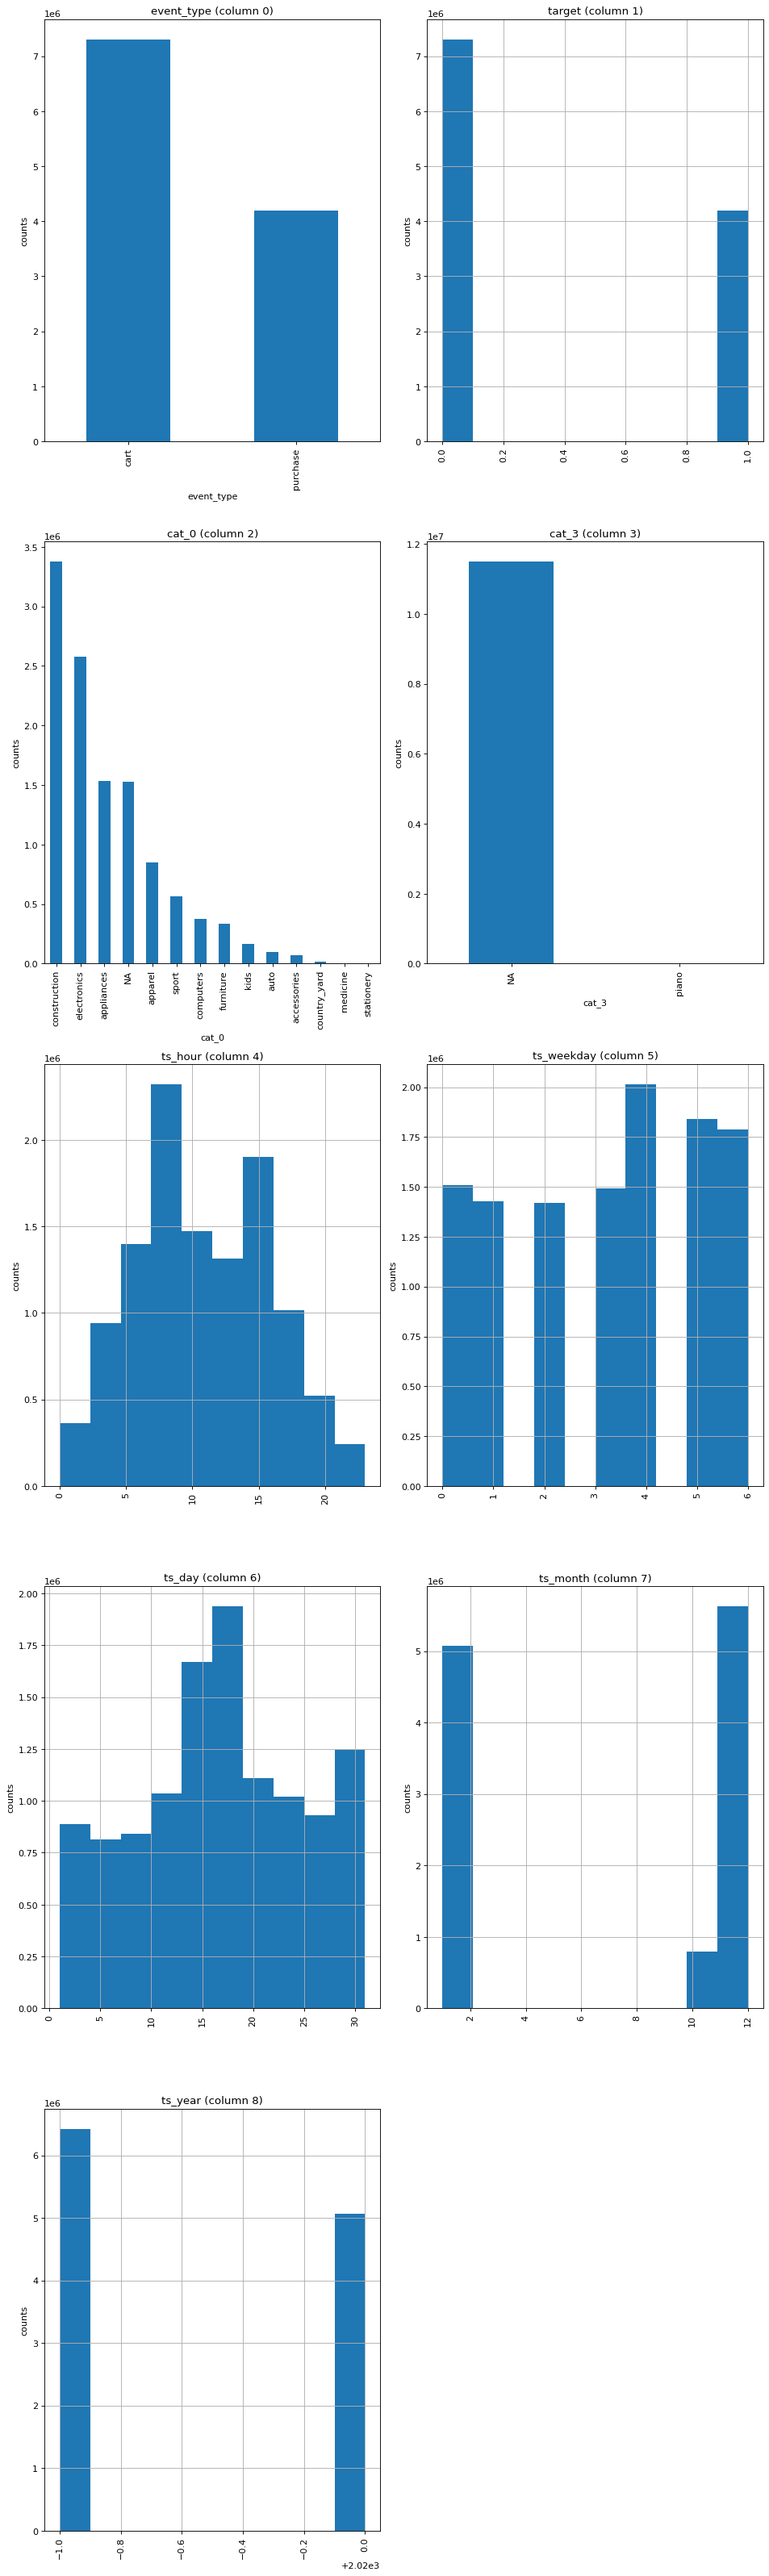

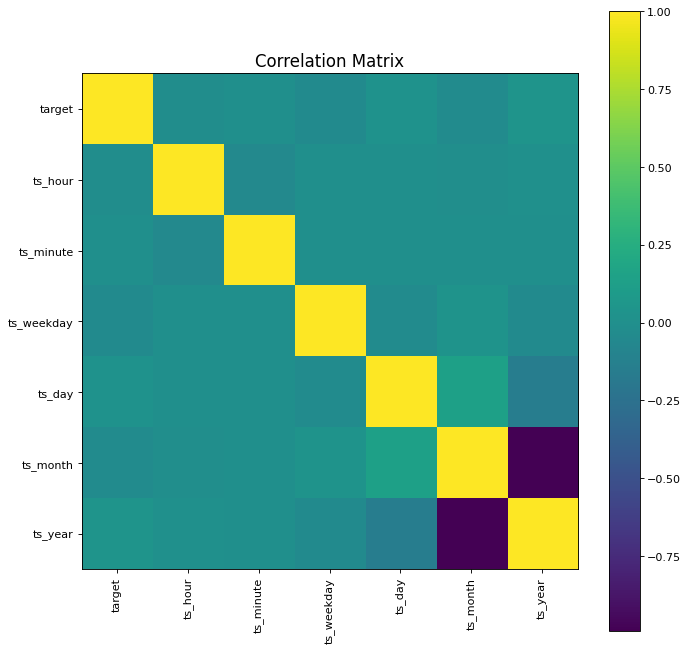

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd


# Define functions for plotting

def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]]
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) // nGraphPerRow
    plt.figure(num=None, figsize=(6 * nGraphPerRow, 8 * nGraphRow), dpi=80, facecolor='w', edgecolor='k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation=90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()

def plotCorrelationMatrix(df, graphWidth):
    numeric_df = df.select_dtypes(include=[np.number])  # Select only numeric columns
    corr = numeric_df.corr()  # Compute correlation for numeric columns
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum=1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix', fontsize=15)
    plt.show()

def plotScatterMatrix(df, plotSize, textSize):
    numeric_df = df.select_dtypes(include=[np.number])  # Select only numeric columns
    numeric_df = numeric_df.dropna(axis='columns')  # Drop columns with missing values
    numeric_df = numeric_df[[col for col in numeric_df if numeric_df[col].nunique() > 1]]
    
    columnNames = list(numeric_df)
    if len(columnNames) > 10:
        columnNames = columnNames[:10]
    numeric_df = numeric_df[columnNames]
    
    ax = pd.plotting.scatter_matrix(numeric_df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = numeric_df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k=1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


# Load the data
data_path = 'C:/Users/Hp/Downloads/data'  
train_data = pd.read_parquet(os.path.join(data_path, 'train.parquet'))
test_data = pd.read_parquet(os.path.join(data_path, 'test.parquet'))
val_data = pd.read_parquet(os.path.join(data_path, 'val.parquet'))

# Display the distribution of column data
plotPerColumnDistribution(train_data, nGraphShown=10, nGraphPerRow=2)

# Display the correlation matrix
plotCorrelationMatrix(train_data, graphWidth=10)

# Display scatter and density plots
plotScatterMatrix(train_data, plotSize=20, textSize=10)
